## My Metric

Number of students enrolled in secondary education (Pre-Kindergarten - 12th grade). The best neighborhood will have the greatest number of students enrolled in school proportional to its population.

### Scoring
Each neighborhood will receive 1 point for every student enrolled in Pre-Kindergarten to 12th grade. The total number of points is then multiplied by the ratio of students enrolled to total population in order to account for population differences in neighborhoods and not penalize neighborhoods with smaller enrollment numbers that are due primarily to a smaller population. 
The Scoring Formula is as follows:

    Total Enrollment Excluding College and Beyond ("Enrollment") = (Total # of Students Enrolled - (# of Students In College + # of Students in Graduate School))
    
    Score = (Enrollment/Population) * 1000
I made an "Enrollment" variable in order to simplify the appearance of the Score Formula, and multiplied by 1000 to make the numbers larger than 1 (not decimals - decimals are not fun to interpret :( ). The dataset contains an "Estiamte; Enrolled in school:" column that includes all students in primary, secondary, and post-secondary education, so it is necessary to subtract the post-secondary education values in order to only consider Pre-Kindergarten to 12th Grade. I am excluding college and beyond becaue, for colleges located in a neighborhood, the dataset does not differentiate between college students originally from the neighborhood and college students who come from different neighborhoods. This distinction is necessary in order to quantify the percentage of students in a neighborhood that go to college; without this information, it is impossible to accurately determine the aforementioned metric. 

Here is my original scoring formula and justification that considered college and graduate students (NOTE: This scoring system will not be used):
>For ranking each neighborhood based on my metric, I am using the following scoring system:

>    Score = ((# of students enrolled in secondary education (Kindergarten - 12th Grade)) + (3 * (# of students enrolled in post-secondary education (college and beyond)))) * (Total Estimated Enrollment/Total Estimated Population)
    
>I applied a 3x multiplier to the # of college students in order to emphasize the importance of kids going to college and benefit neighborhoods that have many students attending college. I chose to do this because I believe more students striving for post-secondary education implies that they will work better paying jobs, perform research in scientific and artistic fields and advance humanity's knowledge base, learn how to be better citizens, and obtain a higher standard of living. These factors improve the people who live in the neighborhood and consequently enhance the neighborhoods's culture, environment, and liveability. On the other hand, students who only attend secondary education or drop out of secondary education are much more likely to obtain low paying jobs and prioritize survival/conformity over research and questioning the world. It is true that poverty-stricken neighborhoods do not have the funds to send their children to college. However, as unfair as it may be, the ability and willingness of the people of a neighborhood to send their children to college greatly enhances the value their children and the neighborhood as a whole add to the world. On the other hand, I multiplied the final score by the ratio of enrolled students to total population in order to prevent smaller neighborhoods from being penalized for having less enrollment simply due to the fact that their population is smaller. I believe that just because a neighborhood is smaller doesn't mean it can't have an impact in the world relative to its size.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas

In [2]:
school_enrollment = pd.read_csv("https://data.wprdc.org/dataset/3cb2b9c2-66e2-4ffa-b0a1-35fb2c6f7230/resource/eb1f8714-e0eb-4614-acfe-dfe0ebab942f/download/school-enrollment-by-detailed-level-of-school-for-the-population-3-years-and-over.csv",  index_col = "Neighborhood")
plt.style.use("classic")

Let's get a picture of the starting dataset before we filter out any neighborhoods:

In [3]:
school_enrollment.count()

Id                                                                                 91
Estimate; Total:                                                                   91
Margin of Error; Total:                                                            91
Estimate; Enrolled in school:                                                      91
Margin of Error; Enrolled in school:                                               91
Estimate; Enrolled in school: - Enrolled in nursery school, preschool              91
Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool       91
Estimate; Enrolled in school: - Enrolled in kindergarten                           91
Margin of Error; Enrolled in school: - Enrolled in kindergarten                    91
Estimate; Enrolled in school: - Enrolled in grade 1                                91
Margin of Error; Enrolled in school: - Enrolled in grade 1                         91
Estimate; Enrolled in school: - Enrolled in grade 2   

So there are 91 neighborhoods in the original dataset. Let's try to bring that number down and sort out some of the 

In [4]:
school_enrollment.sample(10)

,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool","Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Margin of Error; Enrolled in school: - Enrolled in kindergarten,Estimate; Enrolled in school: - Enrolled in grade 1,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Elliott,30,2468.0,406.145294,860.0,242.499485,60.0,55.650696,38.0,50.049975,46.0,...,67.0,57.183914,64.0,44.519659,99.0,49.769469,37.0,29.580399,1608.0,231.086564
Middle Hill,51,1723.0,281.065829,318.0,113.951744,6.0,16.763055,15.0,16.733201,21.0,...,14.0,26.153394,67.0,52.621288,82.0,48.846699,21.0,23.685439,1405.0,234.991489
Northview Heights,59,1454.0,286.000000,560.0,201.000000,28.0,25.000000,57.0,46.000000,25.0,...,36.0,39.000000,9.0,11.000000,108.0,75.000000,17.0,27.000000,894.0,168.000000
Friendship,34,1801.0,258.172423,604.0,152.200526,13.0,24.166092,8.0,16.401219,0.0,...,11.0,18.867962,23.0,31.400637,106.0,66.068147,409.0,130.176803,1197.0,226.108381
South Oakland,71,2910.0,508.969547,1598.0,391.276117,0.0,20.000000,0.0,20.000000,17.0,...,0.0,20.000000,11.0,24.979992,1042.0,294.820284,339.0,238.337995,1312.0,280.752560
West End,88,235.0,138.000000,71.0,60.000000,0.0,10.000000,0.0,10.000000,0.0,...,0.0,10.000000,0.0,10.000000,71.0,60.000000,0.0,10.000000,164.0,101.000000
Spring Garden,75,809.0,144.972411,96.0,37.443290,14.0,14.142136,0.0,14.142136,0.0,...,11.0,14.866069,8.0,15.620499,0.0,14.142136,6.0,13.453624,713.0,136.124943
Bloomfield,10,8498.0,469.304805,2185.0,264.384190,39.0,32.908965,30.0,39.306488,41.0,...,27.0,38.961519,88.0,63.340350,693.0,166.027106,983.0,181.526858,6313.0,385.164900
Troy Hill,85,2225.0,314.720511,458.0,102.068604,24.0,31.384710,0.0,14.142136,0.0,...,34.0,27.802878,9.0,17.204651,122.0,67.475922,65.0,45.607017,1767.0,287.516956


Just by looking at 10 randomly-selected neighborhoods, there seems to be a wide disparity in estimated total school enrollment between neighborhoods where some have total enrollment in the thousands while some have total enrollment that is less than 100. This can be partially accounted for lack of resources to send kids to college, students dropping out of high school in order to get a job, and, significantly, a difference in population size. However, cases like the following just don't make sense:

In [5]:
school_enrollment["Estimate; Enrolled in school:"].min()

0.0

I do not know how to explain this datapoint, but I can say with certainty that this neighborhood will NOT be the best neighborhood simply for the fact that it has 0 students attending any level of school. Plotting the data values in a scatterplot should reveal any and all outliers:

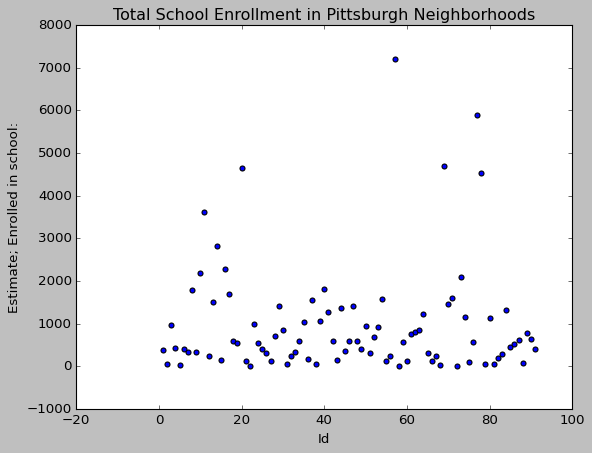

In [6]:
school_enrollment.plot(kind = "scatter", x = "Id", y = "Estimate; Enrolled in school:", title = "Total School Enrollment in Pittsburgh Neighborhoods")

Based on the distribution shown in the scatterplot, it makes sense to filter out neighborhoods with less than a combined of 100 students in all levels of schooling because some neighborhood's enrollment numbers don't make sense or invalidate considering them (like having an enrollment total of 0) and the sample size is too small to make accurate determinations:

In [7]:
query_mask = school_enrollment["Estimate; Enrolled in school:"] > 100
school_enrollment_above_100 = school_enrollment[query_mask]

Taking a look at the filtered results:

In [8]:
school_enrollment_above_100.head(15)

,Id,Estimate; Total:,Margin of Error; Total:,Estimate; Enrolled in school:,Margin of Error; Enrolled in school:,"Estimate; Enrolled in school: - Enrolled in nursery school, preschool","Margin of Error; Enrolled in school: - Enrolled in nursery school, preschool",Estimate; Enrolled in school: - Enrolled in kindergarten,Margin of Error; Enrolled in school: - Enrolled in kindergarten,Estimate; Enrolled in school: - Enrolled in grade 1,...,Estimate; Enrolled in school: - Enrolled in grade 11,Margin of Error; Enrolled in school: - Enrolled in grade 11,Estimate; Enrolled in school: - Enrolled in grade 12,Margin of Error; Enrolled in school: - Enrolled in grade 12,"Estimate; Enrolled in school: - Enrolled in college, undergraduate years","Margin of Error; Enrolled in school: - Enrolled in college, undergraduate years",Estimate; Enrolled in school: - Graduate or professional school,Margin of Error; Enrolled in school: - Graduate or professional school,Estimate; Not enrolled in school,Margin of Error; Not enrolled in school
Neighborhood,,,,,,,,,,,,,,,,,,,,,
Allegheny Center,1,1389.0,193.000000,394.0,120.000000,48.0,29.000000,0.0,10.000000,46.0,...,0.0,10.000000,21.0,32.000000,150.0,60.000000,51.0,35.000000,995.0,135.000000
Allentown,3,2520.0,449.503059,965.0,312.800256,19.0,22.825424,23.0,28.722813,120.0,...,41.0,53.823787,81.0,72.718636,125.0,87.120606,74.0,101.469207,1555.0,267.807767
Arlington,4,1823.0,342.302498,427.0,127.722355,7.0,17.916473,6.0,17.916473,5.0,...,37.0,27.000000,17.0,27.856777,142.0,69.231496,16.0,18.493242,1396.0,267.159129
Banksville,6,3787.0,569.215249,402.0,186.180020,28.0,37.749172,0.0,20.000000,23.0,...,15.0,31.240999,25.0,33.376639,23.0,32.924155,99.0,93.616238,3385.0,509.464425
Bedford Dwellings,7,1251.0,149.000000,337.0,121.000000,28.0,34.000000,57.0,43.000000,28.0,...,22.0,20.000000,12.0,19.000000,24.0,20.000000,0.0,10.000000,914.0,102.000000
Beechview,8,7770.0,685.333495,1783.0,313.268256,145.0,74.337070,47.0,44.888751,51.0,...,26.0,36.959437,80.0,58.497863,559.0,142.112631,210.0,83.731714,5987.0,543.243960
Beltzhoover,9,1609.0,310.282130,342.0,137.640837,19.0,24.979992,0.0,20.000000,0.0,...,40.0,49.203658,24.0,37.269290,140.0,76.642025,6.0,20.000000,1267.0,242.159039
Bloomfield,10,8498.0,469.304805,2185.0,264.384190,39.0,32.908965,30.0,39.306488,41.0,...,27.0,38.961519,88.0,63.340350,693.0,166.027106,983.0,181.526858,6313.0,385.164900
Bluff,11,6289.0,395.562890,3625.0,295.780324,22.0,22.912878,18.0,21.656408,0.0,...,0.0,20.000000,30.0,39.306488,3376.0,300.101649,161.0,66.030296,2664.0,248.909622


Plotting the results in a histogram to visualize the results:

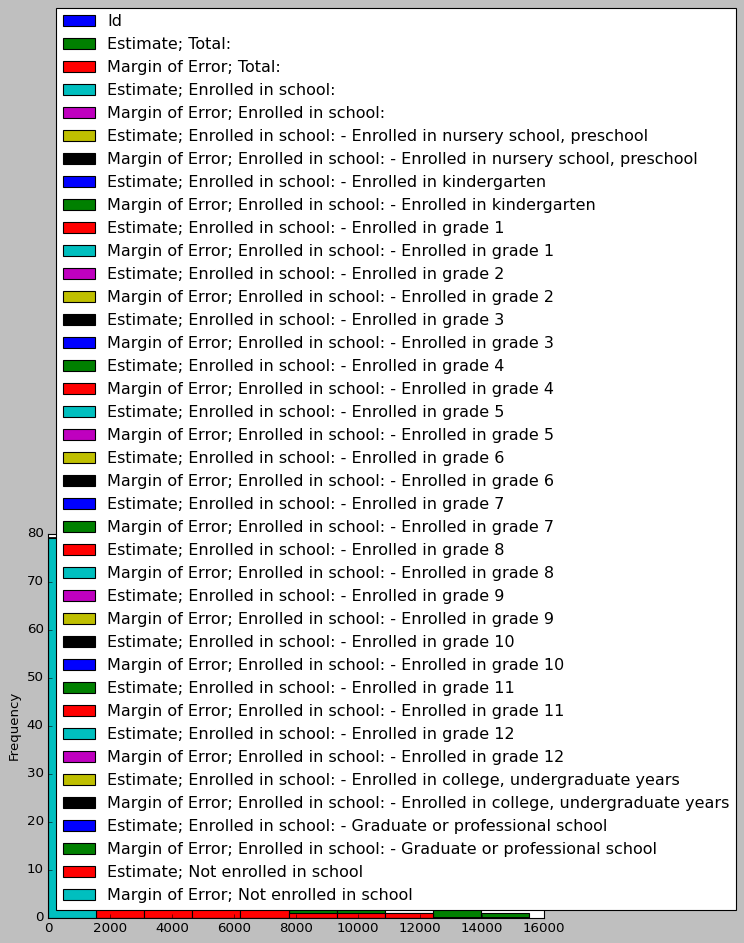

In [9]:
school_enrollment_above_100.plot(kind = "hist", title = "Total School Enrollment in Pittsburgh Neighborhoods")

I should probably explicitly define the y-axis: 

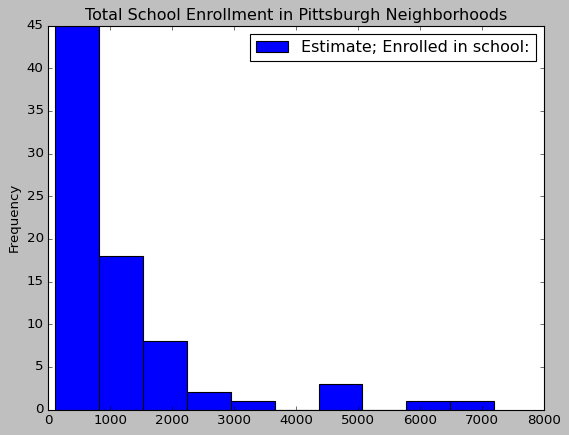

In [10]:
school_enrollment_above_100.plot(kind = "hist", x = "Id", y = "Estimate; Enrolled in school:", title = "Total School Enrollment in Pittsburgh Neighborhoods")

Well that doesn't tell us anything! Maybe plotting the results in a bar graph will be better:

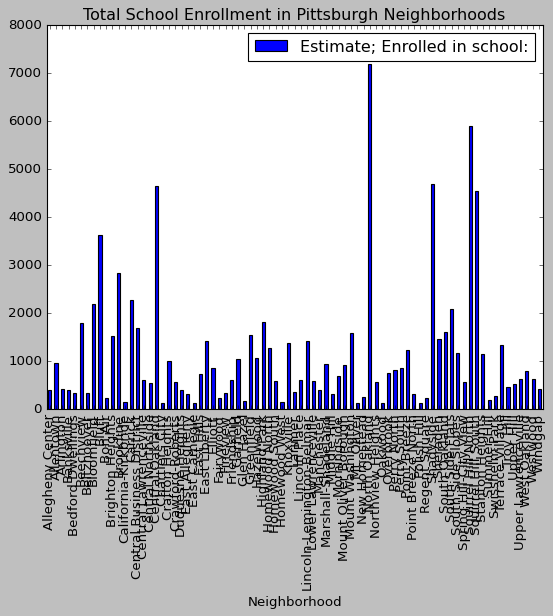

In [11]:
school_enrollment_above_100.plot(kind = "bar", y = "Estimate; Enrolled in school:", title = "Total School Enrollment in Pittsburgh Neighborhoods")

At least there are readable bars now. Just by taking a cursory glance at the graph it easy to tell that there are some neighborhoods with outstanding overall enrollment estimates while the majority of neighborhoods sit below the 8000 mark. There is clearly a need to narrow down the better neighborhoods since so many are still in the running. It would be easy to simply exclude all of the neighborhoods that have less than 8000 Estimated Total Enrollment which would only leave a few with the highest estimate totals. But there are 2 major problems with this approach:

1. The values in the graph are ESTIMATES, NOT EXACT NUMBERS. As such, each neighborhood has a margin of error. It is quite possible that, for example, if the neighborhood in second place has a margin of error of 150, the actual total for the neighborhood could be less than the neighborhood in third place. This is compounded by the fact that the dataset lists the 90% margin of error, meaning that there is a 10% probability that the margin of error could be greater or less than the "Estimate of Total Enrollment - margin of error" and "Estimate of Total Enrollment + margin of error", respectively.   
2. It is highly probable that the places with much higher estimates also have much larger populations which implicitly gives them an advantage. The ideal way then is to find the ratio of the Population to Estimate Total Enrollment. Fortuantely, the School-Enrollment dataset contains the estimated population sizes for each neighborhood.

In order to address the first problem, it is necessary to create a ratio of Margin of Error to Total School Enrollment and determine a base line ratio which tests whether or not a neighborhood's margin of error is too great. In order to do this, ratios of all neighborhoods will need to be calculated, the mean of the ratios will need to be determined, and then the neighborhood whose ratio is greater than the mean's will be filtered out:

In [12]:
SE_above100_MarginOfError = school_enrollment_above_100.copy()
MarginOfError_to_Enrollment_Ratio = SE_above100_MarginOfError["Margin of Error; Enrolled in school:"].sum()/SE_above100_MarginOfError["Estimate; Enrolled in school:"].sum()
SE_above100_MarginOfError["MoE:Enrollment Ratio"] = SE_above100_MarginOfError["Margin of Error; Enrolled in school:"]/SE_above100_MarginOfError["Estimate; Enrolled in school:"]

Taking a look at the ratios:

In [13]:
SE_above100_MarginOfError["MoE:Enrollment Ratio"]

Neighborhood
Allegheny Center       0.304569
Allentown              0.324145
Arlington              0.299116
Banksville             0.463134
Bedford Dwellings      0.359050
                         ...   
Upper Hill             0.549050
Upper Lawrenceville    0.329938
West Oakland           0.289510
Westwood               0.300796
Windgap                0.488810
Name: MoE:Enrollment Ratio, Length: 79, dtype: float64

It seems the ratios vary quite a bit. Now that a column with the ratios has been reated, it is time to apply the filter and eliminate neighborhoods whose Margin of Error in Enrollment is too great in proprotion to their Total School Enrollment:

In [14]:
MoE_Enrollment_filter = SE_above100_MarginOfError["MoE:Enrollment Ratio"] > SE_above100_MarginOfError["MoE:Enrollment Ratio"].mean()
MoE_over100_Filtersapplied = SE_above100_MarginOfError[MoE_Enrollment_filter]

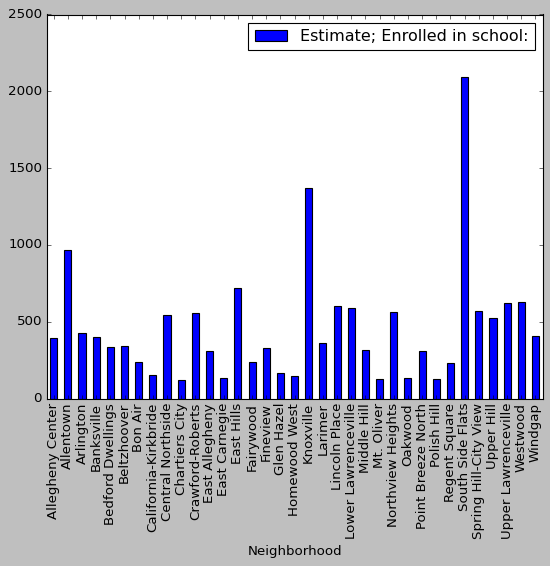

In [15]:
MoE_over100_Filtersapplied.plot(kind = "bar", y = "Estimate; Enrolled in school:")

Well it seems the filter eliminated the strongest contenders which would mean the "best" neighborhood will be one that has thousands of students less than the previous greatest. Maybe its not such a good idea to use this filter. Besides, the neighborhoods with the greatest values are separated by a great margin, so the Margin of Error shouldn't be that big of a problem. Additionally, the 90% confidence of Margin of Error could harm the filter's effectiveness as that could be the difference between remaining in the ranks or being eliminated. Overall, it is better to **NOT** eliminate neighborhoods based on their proportional Margin of Error. This method is not perfect, but it is sufficient.



In terms of the second problem, the School Enrollment dataset does indeed include two columns, "Estimate; Total:" and "Margin of Error; Total:". These two columns contain the populations and Margin of Error in populations, repsectively, for all of the neighborhoods in this dataset. How do I know the coumns are for population? Here's how:

The "total-population.csv" is a dataset from the WPRDC that contains population figures for neighborhoods in Pittsburgh. Its column names, "Estimate; Total" and "Margin of Error; Total", are very similar to the column names in the School Enrollment dataset. Comparing the total population estimate values in each datset will be sufficient to prove that the School Enrollment dataset does indeed contain population figures. Since the Total Population Dataset is from 2015 and the School Enrollment dataset is from 2016, the numbers will be slightly different. If the values between the 2 datasets have a difference of less than 5%, then it can be said with great confidence that the School Enrollment's columns "Estimate; Total:" and "Marign of Error; Total:" contain the population and margin of error in population values, respectively, for 2016:

In [16]:
population_dataset = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/82f29015-6905-4b1c-8300-afe9bb2231b3/download/total-population.csv")
population_dataset.head(10)

,Neighborhood,Id,Estimate; Total,Margin of Error; Total
0,Allegheny Center,1,1411.0,196.000000
1,Allegheny West,2,343.0,96.000000
2,Allentown,3,2558.0,449.773276
3,Arlington,4,1852.0,348.188168
4,Arlington Heights,5,272.0,126.000000
5,Banksville,6,3858.0,581.107563
6,Bedford Dwellings,7,1349.0,180.000000
7,Beechview,8,8078.0,719.658252
8,Beltzhoover,9,1702.0,343.072879
9,Bloomfield,10,8669.0,491.348145


In [17]:
population_check = school_enrollment["Estimate; Total:"]/population_dataset["Estimate; Total"]
population_check

Allegheny Center    NaN
Allegheny West      NaN
Allentown           NaN
Arlington           NaN
Arlington Heights   NaN
                     ..
86                  NaN
87                  NaN
88                  NaN
89                  NaN
90                  NaN
Length: 182, dtype: float64

Well it seems like the values are being populated with NaN ("Not a Number"). It might be caused by the use of 2 different datasets. Let's try the "div" method to see if that has better results:

In [18]:
population_check2 = school_enrollment["Estimate; Total:"].div(population_dataset["Estimate; Total"])
population_check2

Allegheny Center    NaN
Allegheny West      NaN
Allentown           NaN
Arlington           NaN
Arlington Heights   NaN
                     ..
86                  NaN
87                  NaN
88                  NaN
89                  NaN
90                  NaN
Length: 182, dtype: float64

Well, that didn't work either :(. Maybe a brute force approace will work?:

In [19]:
school_population = [school_enrollment["Estimate; Total:"]]
total_population = [population_dataset["Estimate; Total"]]
total_pop_counter = 0
ratio = []
for value in school_population:
    ratio.append(value/population_dataset.iloc[total_pop_counter])
    total_pop_counter += 1
ratio

[Allegheny Center       NaN
 Allegheny West         NaN
 Allentown              NaN
 Arlington              NaN
 Arlington Heights      NaN
                       ... 
 Upper Lawrenceville    NaN
 West End               NaN
 West Oakland           NaN
 Westwood               NaN
 Windgap                NaN
 Length: 95, dtype: object]

Well this isn't working XD. Maybe a graph will look better:

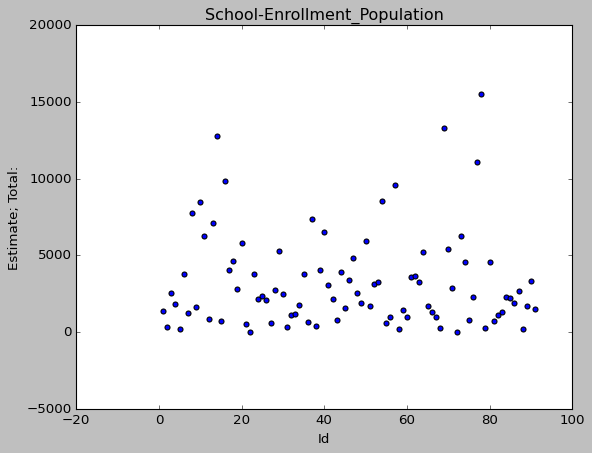

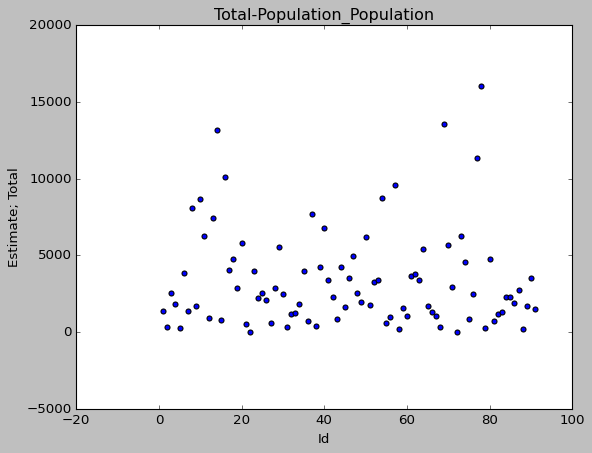

In [20]:
school_enrollment.plot.scatter(x = "Id", y= "Estimate; Total:", title = "School-Enrollment_Population")
population_dataset.plot.scatter(x = "Id", y= "Estimate; Total", title = "Total-Population_Population")

YES! I think just by looking at it you can tell they are almost identical. This verifies that the "Estimate; Total:" column in the School-Enrollment dataset does indeed contain the estimated total population for each neighborhood.


Now that it has been proven that the School-Enrollment dataset has access to the estimated total populations for each neighborhood for the year 2016, it is time to calculate the score. Since my scoring system gives points for school enrollment and controls for population size, the scores should give a good picture of the relative school enrollment in each neighborhood:

In [21]:
Enrollment = school_enrollment["Estimate; Enrolled in school:"]-(school_enrollment["Estimate; Enrolled in school: - Enrolled in college, undergraduate years"] + school_enrollment["Estimate; Enrolled in school: - Graduate or professional school"])
Population = school_enrollment["Estimate; Total:"]
school_enrollment["Points"] = (Enrollment/Population) * 1000
school_enrollment["Points"].head(20)

Neighborhood
Allegheny Center             138.948884
Allegheny West                99.125364
Allentown                    303.968254
Arlington                    147.558969
Arlington Heights            131.455399
Banksville                    73.937153
Bedford Dwellings            250.199840
Beechview                    130.501931
Beltzhoover                  121.814792
Bloomfield                    59.896446
Bluff                         13.992686
Bon Air                      247.139588
Brighton Heights             156.364147
Brookline                    160.835877
California-Kirkbride         151.556157
Carrick                      171.094148
Central Business District     17.091900
Central Lawrenceville         58.456910
Central Northside            151.697313
Central Oakland                7.385778
Name: Points, dtype: float64

The scores vary more than I thought they would, but just by looking at the neighborhoods with low scores, I can see a couple with high populations that have low scores. A standout example is Central Oakland which has very few students enrolled in Pre-Kindergarten - 12th grade possibly due to having more colleges/universities than schools. However, this factor is not covered in this metric for aforementioend reasons and thus Oakland receives a dismal score for having low school enrollment. After sorting the scores:

In [22]:
neighborhoods_sorted = school_enrollment.sort_values(by = "Points", ascending = False)
neighborhoods_sorted["Points"]

Neighborhood
Homewood North       320.458265
Allentown            303.968254
Northview Heights    299.174691
Knoxville            296.089385
Elliott              293.354943
                        ...    
Central Oakland        7.385778
South Shore            0.000000
Ridgemont              0.000000
West End               0.000000
Chateau                0.000000
Name: Points, Length: 91, dtype: float64

#### Homewood North is the winner with the highest score of 320.46! 

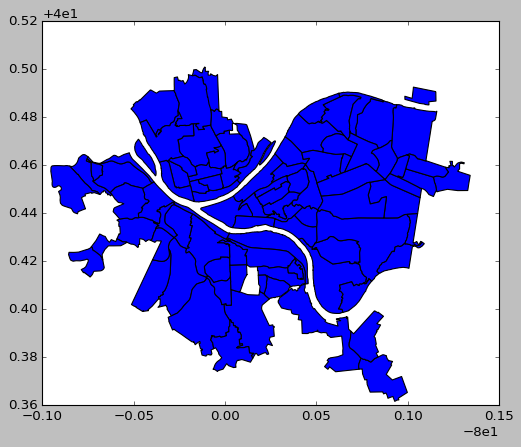

In [23]:
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
neighborhoods.plot()

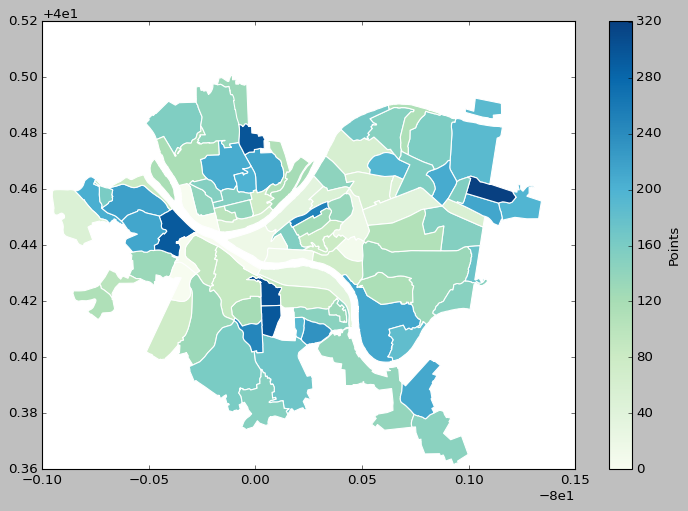

In [24]:
enrollment_map = neighborhoods.merge(neighborhoods_sorted, how='left', left_on='hood', right_on='Neighborhood')
enrollment_map.plot(column = "Points",
               cmap = 'GnBu',
               edgecolor="white",
               legend=True,
               legend_kwds={'label': "Points"}, 
               figsize=(11, 7))

From the map it seems high scoring neighborhoods are clustered together and the neighborhoods in Pittsburgh overall score on the low end in terms of school enrollment. It also looks pretty which is a plus!

In [25]:
#Assigning Scores from 100-10 to each neighborhood for the final metric.
neighborhoods_sorted["Score(School Enrollment)"] = range(100,100-len(neighborhoods_sorted),-1)
neighborhoods_sorted["Score(School Enrollment)"]

Neighborhood
Homewood North       100
Allentown             99
Northview Heights     98
Knoxville             97
Elliott               96
                    ... 
Central Oakland       14
South Shore           13
Ridgemont             12
West End              11
Chateau               10
Name: Score(School Enrollment), Length: 91, dtype: int64

***EXTRA:*** Below is the code for calculating scores with college taken into consideration and college and graduate students being given 3x the weightage as students in primary and secondary education:

In [26]:
school_enrollment_above_100_2 = school_enrollment_above_100.copy()
school_enrollment_above_100_2["Points"] = (school_enrollment_above_100["Estimate; Enrolled in school:"] + 3*(school_enrollment_above_100["Estimate; Enrolled in school: - Enrolled in college, undergraduate years"] + school_enrollment_above_100["Estimate; Enrolled in school: - Graduate or professional school"]))*(school_enrollment_above_100["Estimate; Enrolled in school:"]/school_enrollment_above_100["Estimate; Total:"])
Final_Scores = school_enrollment_above_100_2["Points"]

In [27]:
Final_Scores.head(20)

Neighborhood
Allegheny Center               282.806335
Allentown                      598.146825
Arlington                      211.040592
Banksville                      81.525218
Bedford Dwellings              110.178257
Beechview                      938.541828
Beltzhoover                    165.792418
Bloomfield                    1854.601671
Bluff                         8205.676578
Bon Air                         78.512586
Brighton Heights               574.213965
Brookline                     1134.064647
California-Kirkbride            55.945873
Carrick                        938.068397
Central Business District     2726.803319
Central Lawrenceville          199.148936
Central Northside              168.847949
Central Oakland              14790.917211
Chartiers City                  42.564286
Crafton Heights                407.490372
Name: Points, dtype: float64

Well it seems like there is a problem: Central Oakland has an absurd 14790 points. This would be ok if it was because a large quantity of its population attended college. However, the University of Pittsburgh is located in Oakland, and the majority of students' homes are not located in Oakland. However, the dataset does not distinguish between temprorary and permanent residents; in context, this means that the dataset does not distinguish between college students who came from Oakland and college students who came from other places. Consequently, it is nigh impossible to consider students enrolled in college and beyond with this dataset, and including college in the scoring system severely skews the results in favor of neighborhoods that contain 1 or more colleges/universities.